**Non-leveraged ETFs** simply track the price of the underlying asset without amplification. Their dynamics can be modeled as:

$$
dX_t = r X_t \, dt + \sigma X_t \, dW_t
$$

**leveraged ETFs use financial derivatives** (such as futures, swaps, or options) to amplify the returns of the underlying asset. This amplification introduces additional complexities, which are captured in the LETF dynamics equation:

$$
dL_t = (r - c)L_t \, dt + \beta \sigma L_t \, dW_t
$$

1. **Leverage Ratio ($\beta$)**:
   - Multiplier that determines how much the LETF's returns are amplified relative to the underlying asset.
   - For example, a 2x LETF has $\beta = 2$, meaning it aims to deliver twice the daily return of the underlying asset.

2. **Risk-Free Rate ($r$) and Expense Fee ($c$)**:
   - $r$ represents the risk-free rate, which is the return on a theoretically risk-free investment (e.g., government bonds).
   - $c$ represents the expense fee, which accounts for the costs of managing the LETF.

3. **Volatility ($\sigma$) and Brownian Motion ($dW_t$)**:
   - $\sigma$ is the volatility of the underlying asset, which measures how much its returns fluctuate over time.
   - $dW_t$ represents the random component of the underlying asset's price movement, modeled as standard Brownian motion.

The LETF’s terminal value $L_T$ is expressed in terms of the underlying asset’s terminal value $X_T$:
$$
\frac{L_T}{L_0} = \left(\frac{X_T}{X_0}\right)^\beta e^{-(r(\beta - 1) + c)T - \frac{\beta(\beta - 1)}{2} \sigma^2 T}
$$


The log-moneyness ($LM$) of LETF options is scaled relative to the underlying ETF:
$$
LM^{(\beta)} = \beta \cdot LM^{(1)} - (r(\beta - 1) + c)T - \frac{\beta(\beta - 1)}{2} \sigma^2 T
$$
where:
- $LM^{(\beta)}$: Log-moneyness for LETF with leverage $\beta$.
- $LM^{(1)}$: Log-moneyness for the unleveraged ETF.

Log-moneyness for unleveraged ETF (LM^(1)): -0.0611
Log-moneyness for leveraged ETF (β=-2): 0.0521
Log-moneyness for leveraged ETF (β=1): -0.0711
Log-moneyness for leveraged ETF (β=2): -0.1921

Log-moneyness Scaling Equation:
LM^(β) = β * LM^(1) - (r(β - 1) + c)T - (β(β - 1)/2)σ^2 T
Where:
  LM^(1) = -0.0611 (log-moneyness for unleveraged ETF)
  r = 0.02 (risk-free rate)
  c = 0.01 (expense fee)
  σ = 0.2 (volatility of underlying asset)
  T = 1.0 (time horizon)


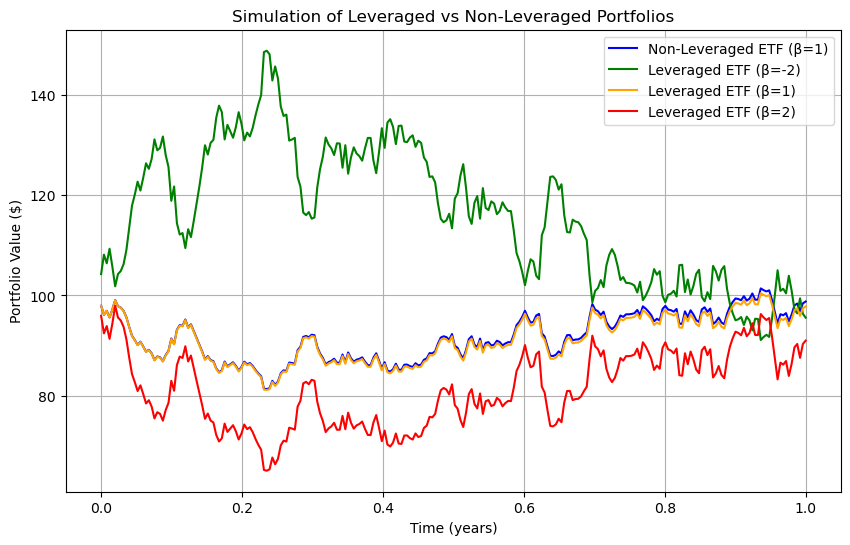

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
T = 1.0  # Time horizon (1 year)
N = 252  # Number of time steps (trading days in a year)
r = 0.02  # Risk-free rate (2%)
c = 0.01  # Expense fee for leveraged ETF (1%)
sigma = 0.2  # Volatility of the underlying asset (20%)
S0 = 100  # Initial price of the underlying asset
K = 105  # Strike price of the option (used for log-moneyness calculation)

# Generate Brownian motion paths
dt = T / N  # Time step size
t = np.linspace(0, T, N)  # Time grid
dW = np.sqrt(dt) * np.random.normal(0, 1, N)  # Brownian motion increments
W = np.cumsum(dW)  # Cumulative Brownian motion path

# Simulate the underlying asset (non-leveraged ETF)
X_t = S0 * np.exp((r - 0.5 * sigma**2) * t + sigma * W)

# Compute log-moneyness for the unleveraged ETF (X_t)
LM_1 = np.log(X_t[-1] / K)  # Log-moneyness for the unleveraged ETF at maturity T
print(f"Log-moneyness for unleveraged ETF (LM^(1)): {LM_1:.4f}")

# Define leverage ratios to simulate
beta_values = [-2, 1, 2]  # Leverage ratios: -2x, 1x, 2x
L_t_dict = {}  # Dictionary to store LETF paths for each β
LM_beta_values = []  # List to store log-moneyness for each β

# Simulate leveraged ETFs for each β
for beta in beta_values:
    # Simulate the leveraged ETF (LETF)
    L_t = S0 * np.exp((r - c - 0.5 * (beta * sigma)**2) * t + beta * sigma * W)
    L_t_dict[beta] = L_t  # Store the LETF path
    
    # Compute log-moneyness for the leveraged ETF (L_t)
    LM_beta = beta * LM_1 - (r * (beta - 1) + c) * T - (beta * (beta - 1) / 2) * sigma**2 * T
    LM_beta_values.append(LM_beta)
    print(f"Log-moneyness for leveraged ETF (β={beta}): {LM_beta:.4f}")

# Print the log-moneyness scaling equation for clarity
print("\nLog-moneyness Scaling Equation:")
print("LM^(β) = β * LM^(1) - (r(β - 1) + c)T - (β(β - 1)/2)σ^2 T")
print("Where:")
print(f"  LM^(1) = {LM_1:.4f} (log-moneyness for unleveraged ETF)")
print(f"  r = {r} (risk-free rate)")
print(f"  c = {c} (expense fee)")
print(f"  σ = {sigma} (volatility of underlying asset)")
print(f"  T = {T} (time horizon)")

# Plot the simulated paths
plt.figure(figsize=(10, 6))
plt.plot(t, X_t, label="Non-Leveraged ETF (β=1)", color='blue')  # Unleveraged ETF
for beta, L_t in L_t_dict.items():
    plt.plot(t, L_t, label=f"Leveraged ETF (β={beta})", color='red' if beta == 2 else 'green' if beta == -2 else 'orange')
plt.title("Simulation of Leveraged vs Non-Leveraged Portfolios")
plt.xlabel("Time (years)")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()


Log-moneyness for key leverage ratios:
β = -2: LM^(β) = 0.0276
β = 1: LM^(β) = -0.0588
β = 2: LM^(β) = -0.1676


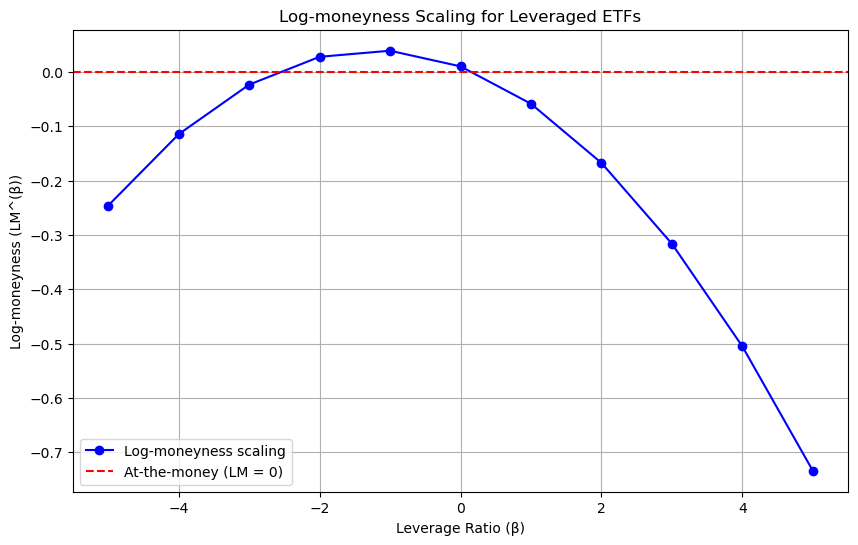


Log-moneyness Scaling Equation:
LM^(β) = β * LM^(1) - (r(β - 1) + c)T - (β(β - 1)/2)σ^2 T
Where:
  LM^(1) = -0.0488 (log-moneyness for unleveraged ETF)
  r = 0.02 (risk-free rate)
  c = 0.01 (expense fee)
  σ = 0.2 (volatility of underlying asset)
  T = 1.0 (time horizon)


In [25]:

LM_1 = -0.0488  # Log-moneyness for the unleveraged ETF (LM^(1)) from previous simulation

# Define leverage ratios (β) to analyze
beta_values = np.arange(-5, 6, 1)  # Leverage ratios from -5 to 5
LM_beta_values = []

# Compute log-moneyness for each leverage ratio
for beta in beta_values:
    LM_beta = beta * LM_1 - (r * (beta - 1) + c) * T - (beta * (beta - 1) / 2) * sigma**2 * T
    LM_beta_values.append(LM_beta)

# Print log-moneyness for key leverage ratios (β = -2, 1, 2)
print("Log-moneyness for key leverage ratios:")
for beta in [-2, 1, 2]:
    LM_beta = beta * LM_1 - (r * (beta - 1) + c) * T - (beta * (beta - 1) / 2) * sigma**2 * T
    print(f"β = {beta}: LM^(β) = {LM_beta:.4f}")

# Plot log-moneyness scaling against leverage ratios
plt.figure(figsize=(10, 6))
plt.plot(beta_values, LM_beta_values, marker='o', color='blue', label="Log-moneyness scaling")
plt.axhline(y=0, color='red', linestyle='--', label="At-the-money (LM = 0)")
plt.title("Log-moneyness Scaling for Leveraged ETFs")
plt.xlabel("Leverage Ratio (β)")
plt.ylabel("Log-moneyness (LM^(β))")
plt.legend()
plt.grid()
plt.show()

# Print the log-moneyness scaling equation for clarity
print("\nLog-moneyness Scaling Equation:")
print("LM^(β) = β * LM^(1) - (r(β - 1) + c)T - (β(β - 1)/2)σ^2 T")
print("Where:")
print(f"  LM^(1) = {LM_1:.4f} (log-moneyness for unleveraged ETF)")
print(f"  r = {r} (risk-free rate)")
print(f"  c = {c} (expense fee)")
print(f"  σ = {sigma} (volatility of underlying asset)")
print(f"  T = {T} (time horizon)")


Implied volatility for key leverage ratios:
β = -2: I^(β) = 0.2143
β = 1: I^(β) = 0.2009
β = 2: I^(β) = 0.1840


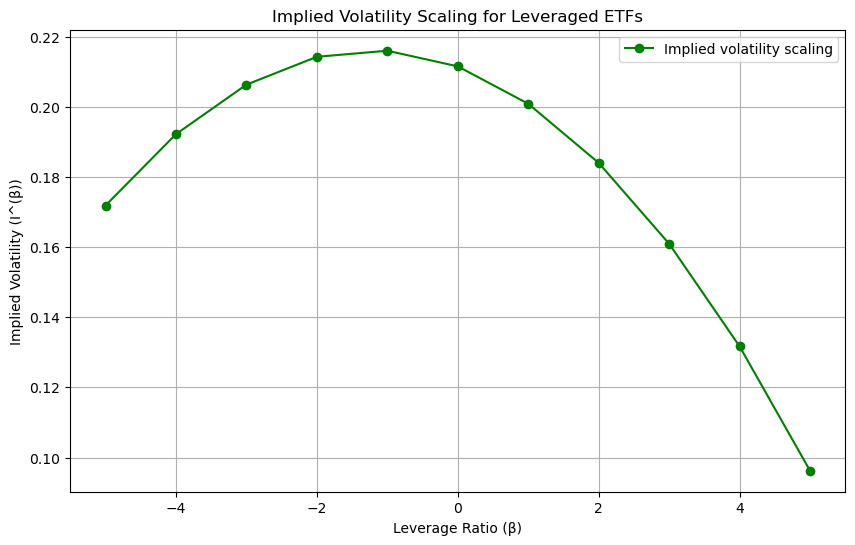


Implied Volatility Approximation Equation:
I^(β) ≈ b^∗_β + τ b^δ_β + (a^ϵ_β + τ a^δ_β) LMMR
Where:
  b^∗_β = 0.2, b^δ_β = 0.01, a^ϵ_β = 0.15, a^δ_β = 0.005
  τ = 1.0 (time to maturity)
  LMMR = LM^(β) / T (log-moneyness to maturity ratio)


In [26]:
# Define leverage ratios (β) to analyze
beta_values = np.arange(-5, 6, 1)  # Leverage ratios from -5 to 5
LM_beta_values = []  # Store log-moneyness for each β
LMMR_values = []  # Store LMMR for each β

# Compute log-moneyness and LMMR for each leverage ratio
for beta in beta_values:
    LM_beta = beta * LM_1 - (r * (beta - 1) + c) * T - (beta * (beta - 1) / 2) * sigma**2 * T
    LM_beta_values.append(LM_beta)
    LMMR = LM_beta / T  # Log-moneyness to maturity ratio (LMMR)
    LMMR_values.append(LMMR)

# Example calibrated parameters (assumed for demonstration)
b_star_beta = 0.2  # Example parameter b^∗_β
b_delta_beta = 0.01  # Example parameter b^δ_β
a_epsilon_beta = 0.15  # Example parameter a^ϵ_β
a_delta_beta = 0.005  # Example parameter a^δ_β

# Compute implied volatility for each leverage ratio
I_beta_values = []  # Store implied volatility for each β
for LMMR in LMMR_values:
    I_beta = b_star_beta + T * b_delta_beta + (a_epsilon_beta + T * a_delta_beta) * LMMR
    I_beta_values.append(I_beta)

# Print implied volatility for key leverage ratios (β = -2, 1, 2)
print("Implied volatility for key leverage ratios:")
for idx, beta in enumerate(beta_values):
    if beta in [-2, 1, 2]:
        print(f"β = {beta}: I^(β) = {I_beta_values[idx]:.4f}")

# Plot implied volatility against leverage ratios
plt.figure(figsize=(10, 6))
plt.plot(beta_values, I_beta_values, marker='o', color='green', label="Implied volatility scaling")
plt.title("Implied Volatility Scaling for Leveraged ETFs")
plt.xlabel("Leverage Ratio (β)")
plt.ylabel("Implied Volatility (I^(β))")
plt.legend()
plt.grid()
plt.show()

# Print the implied volatility approximation equation for clarity
print("\nImplied Volatility Approximation Equation:")
print("I^(β) ≈ b^∗_β + τ b^δ_β + (a^ϵ_β + τ a^δ_β) LMMR")
print("Where:")
print(f"  b^∗_β = {b_star_beta}, b^δ_β = {b_delta_beta}, a^ϵ_β = {a_epsilon_beta}, a^δ_β = {a_delta_beta}")
print(f"  τ = {T} (time to maturity)")
print(f"  LMMR = LM^(β) / T (log-moneyness to maturity ratio)")

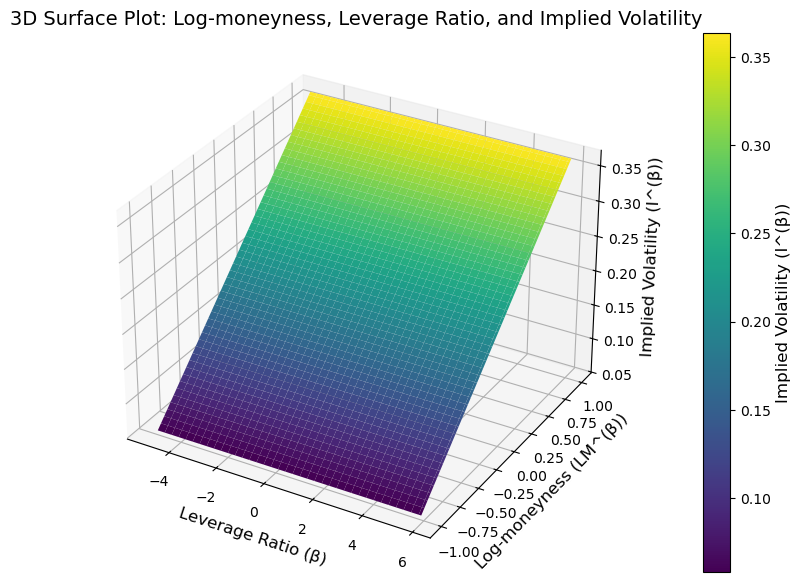


Implied Volatility Approximation Equation:
I^(β) ≈ b^∗_β + τ b^δ_β + (a^ϵ_β + τ a^δ_β) LMMR
Where:
  b^∗_β = 0.2, b^δ_β = 0.01, a^ϵ_β = 0.15, a^δ_β = 0.005
  τ = 1.0 (time to maturity)
  LMMR = LM^(β) / T (log-moneyness to maturity ratio)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the scenario
T = 1.0  # Time horizon (1 year)
r = 0.02  # Risk-free rate (2%)
c = 0.01  # Expense fee for leveraged ETF (1%)
sigma = 0.2  # Volatility of the underlying asset (20%)
S0 = 100  # Initial price of the underlying asset
K = 105  # Strike price of the option (used for log-moneyness calculation)
LM_1 = -0.0488  # Log-moneyness for the unleveraged ETF (LM^(1)) from previous simulation

# Define leverage ratios (β) to analyze
beta_values = np.arange(-5, 6, 0.1)  # Leverage ratios from -5 to 5 with finer granularity

# Example calibrated parameters (assumed for demonstration)
b_star_beta = 0.2  # Example parameter b^∗_β
b_delta_beta = 0.01  # Example parameter b^δ_β
a_epsilon_beta = 0.15  # Example parameter a^ϵ_β
a_delta_beta = 0.005  # Example parameter a^δ_β

# Create a meshgrid for leverage ratios and log-moneyness values
beta, LM_beta = np.meshgrid(beta_values, np.linspace(-1, 1, 100))

# Compute LMMR for each combination of leverage ratio and log-moneyness
LMMR = LM_beta / T  # Log-moneyness to maturity ratio (LMMR)

# Compute implied volatility for each combination of leverage ratio and LMMR
I_beta = b_star_beta + T * b_delta_beta + (a_epsilon_beta + T * a_delta_beta) * LMMR

# Create 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(beta, LM_beta, I_beta, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Leverage Ratio (β)', fontsize=12)
ax.set_ylabel('Log-moneyness (LM^(β))', fontsize=12)
ax.set_zlabel('Implied Volatility (I^(β))', fontsize=12)
ax.set_title('3D Surface Plot: Log-moneyness, Leverage Ratio, and Implied Volatility', fontsize=14)

# Add a color bar to map values to colors
cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Implied Volatility (I^(β))', fontsize=12)

# Show the plot
plt.show()

# Print the implied volatility approximation equation for clarity
print("\nImplied Volatility Approximation Equation:")
print("I^(β) ≈ b^∗_β + τ b^δ_β + (a^ϵ_β + τ a^δ_β) LMMR")
print("Where:")
print(f"  b^∗_β = {b_star_beta}, b^δ_β = {b_delta_beta}, a^ϵ_β = {a_epsilon_beta}, a^δ_β = {a_delta_beta}")
print(f"  τ = {T} (time to maturity)")
print(f"  LMMR = LM^(β) / T (log-moneyness to maturity ratio)")
